# 分割表の統計解析 Chapter 1
## 目的
- 説明変数と目的変数の関連性（カイ二乗適合度検定,尤度比検定）
- 説明変数と目的変数の関連性の度合（コレスポンデンス分析）
- 処理群と対照群の差
- 交絡因子の解明によるシンプソンパラドックスの抑制

In [1]:
import sys
sys.path.append('../../lib/')

In [2]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import japanize_matplotlib 
import matplotlib.pyplot as plt
from cta import ContingencyTableAnalysis as CTA

## 共通メソッド

In [3]:
def summary(df, head_or_tail='head', n=0):
    if n==0:
        print(df.shape)
        display(df)
    else:
        display_info = {'head': df.head(n), 'tail': df.tail(n)}
        print(df.shape)
        display(display_info[head_or_tail])

## 行列和が確定的

In [4]:
# サンプル
grades = ['優', '良', '可', '不可']
df_math_grade = pd.DataFrame(
    [[18, 7, 1, 2], [16, 13, 17, 12], [7, 3, 10, 21], [7, 2, 3, 6]],
    ['微積' + '_' + grade for grade in grades],
    ['代数' + '_' + grade for grade in grades]
)
summary(df_math_grade)

(4, 4)


,代数_優,代数_良,代数_可,代数_不可
微積_優,18,7,1,2
微積_良,16,13,17,12
微積_可,7,3,10,21
微積_不可,7,2,3,6


In [5]:
# オブジェクト
cta_math_grade = CTA(df_math_grade, '微積_合計', '代数_合計', 'all')

In [6]:
# 最尤推定値
summary(cta_math_grade.maximum_likelihood_estimate())

(4, 4)


,代数_優,代数_良,代数_可,代数_不可
微積_優,0.063924,0.033294,0.041284,0.054602
微積_良,0.132414,0.068966,0.085517,0.113103
微積_可,0.093603,0.048751,0.060452,0.079952
微積_不可,0.041094,0.021403,0.026540,0.035101


In [7]:
# 期待値
summary(cta_math_grade.get_expected_frequency())

(4, 4)


,代数_優,代数_良,代数_可,代数_不可
微積_優,9.268966,4.827586,5.986207,7.917241
微積_良,19.200000,10.000000,12.400000,16.400000
微積_可,13.572414,7.068966,8.765517,11.593103
微積_不可,5.958621,3.103448,3.848276,5.089655


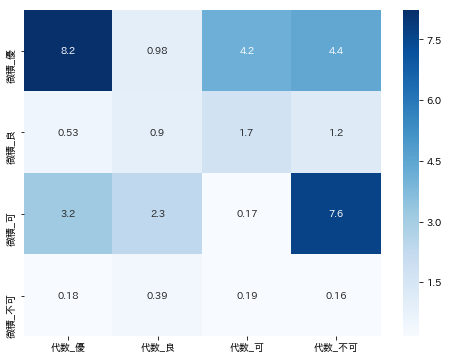

In [8]:
# 部分検定統計量（乖離度）
plt.figure(figsize=(8, 6))
sns.heatmap(cta_math_grade.get_partial_fit(), cmap='Blues', annot=True)

In [ ]:
# 独立性検定


In [9]:
# 検定
print(cta_math_grade.chi2_fit_test(0.99))

{'chi2_fit': 36.35368807073809, 'chi2_per': 21.665994333461924, 'test_result': False}


## 行和または列和が確定的

,A,B,C
0,1,1,1
1,2,2,2
2,3,3,3
